### Introduction 

online_shoppers_intention.csv on UCI Machine Learning Repository consists of 12,330
sessions with 84.5% negative class samples, i.e.; it was not ended with shopping, Only 15.5%
did shopping. 

Data set has 18 attributes.

Repository dataset as it is filtered to make sure each session would belong to a different user in a 1-year period to
avoid any tendency to a specific campaign, special day, user profile or period.

In [557]:
import pandas as pd
import numpy as np

import scipy 
from scipy.stats import norm
from scipy.stats import ttest_ind

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import ensemble 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [558]:
df = pd.read_csv('online_shoppers_intention.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12316 non-null float64
Administrative_Duration    12316 non-null float64
Informational              12316 non-null float64
Informational_Duration     12316 non-null float64
ProductRelated             12316 non-null float64
ProductRelated_Duration    12316 non-null float64
BounceRates                12316 non-null float64
ExitRates                  12316 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes:

### DATA WRANGLING

In [559]:
df = df[~df.ProductRelated_Duration.isnull()]   
len(df)*100/12330

99.88645579886456

In [560]:
df_w = df
for col in df_w.columns[0:6]:
    df_w = df_w[ df_w[col] != 0 ]
    
#len(df_w)*100/12330
df_w.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
57,4.0,56.000000,2.0,120.0,36.0,998.741667,0.000000,0.014736,19.447079,0.2,Feb,2,2,4,1,Returning_Visitor,False,False
103,2.0,31.000000,1.0,16.0,36.0,2083.530952,0.000000,0.013510,0.000000,0.8,Feb,2,2,4,3,Returning_Visitor,False,False
109,6.0,326.250000,4.0,94.0,128.0,5062.213753,0.000855,0.017918,0.000000,0.0,Feb,2,5,1,3,Returning_Visitor,False,False
161,2.0,58.000000,2.0,22.0,31.0,829.166667,0.030303,0.040606,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,True,False
187,10.0,293.778205,2.0,153.0,96.0,3283.166739,0.001961,0.013509,0.000000,0.0,Mar,3,2,6,2,Returning_Visitor,True,False


### Features

Data set consists of 10 numerical and 8 categorical attributes. 

In [561]:
df[['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated','BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month']].head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,ExitRates,PageValues,SpecialDay,Month
0,0.0,0.0,0.0,0.0,1.0,0.20,0.20,0.0,0.0,Feb
1,0.0,0.0,0.0,0.0,2.0,0.00,0.10,0.0,0.0,Feb
2,0.0,-1.0,0.0,-1.0,1.0,0.20,0.20,0.0,0.0,Feb
3,0.0,0.0,0.0,0.0,2.0,0.05,0.14,0.0,0.0,Feb
4,0.0,0.0,0.0,0.0,10.0,0.02,0.05,0.0,0.0,Feb


In [562]:
df [ ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType','Weekend', 'Revenue'] ].head()

,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,1,1,1,1,Returning_Visitor,False,False
1,2,2,1,2,Returning_Visitor,False,False
2,4,1,9,3,Returning_Visitor,False,False
3,3,2,2,4,Returning_Visitor,False,False
4,3,3,1,4,Returning_Visitor,True,False


In [563]:
df1 = df[ df['Revenue']==True ]
df2 = df[ df['Revenue']==False ]

In [564]:
df['Revenue'].value_counts()

False    10408
True      1908
Name: Revenue, dtype: int64

In [565]:
df['Revenue'].value_counts()[0]/df['Revenue'].value_counts().sum(), df['Revenue'].value_counts()[1]/df['Revenue'].value_counts().sum()

(0.8450795712893797, 0.15492042871062034)

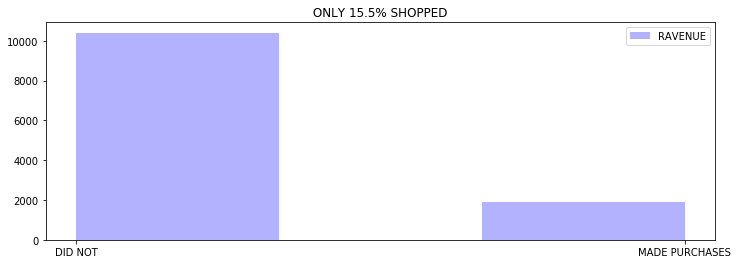

In [566]:
plt.figure(figsize=(12,4))
df['Revenue'].apply(lambda x: 1 if (x==True) else False ).hist(bins=3, alpha=0.3, color='blue', label='RAVENUE')
plt.grid()
plt.xticks([0,1],('DID NOT', 'MADE PURCHASES'))
plt.autoscale(enable=True)
plt.legend()
plt.title(' ONLY 15.5% SHOPPED ')
plt.show()

#### REVENUE VS Weekend 

In [567]:
df['Weekend'].value_counts()

False    9451
True     2865
Name: Weekend, dtype: int64

In [568]:
df['Weekend'].value_counts()[0]/df['Weekend'].value_counts().sum(), df['Weekend'].value_counts()[1]/df['Weekend'].value_counts().sum()

(0.7673757713543359, 0.23262422864566418)

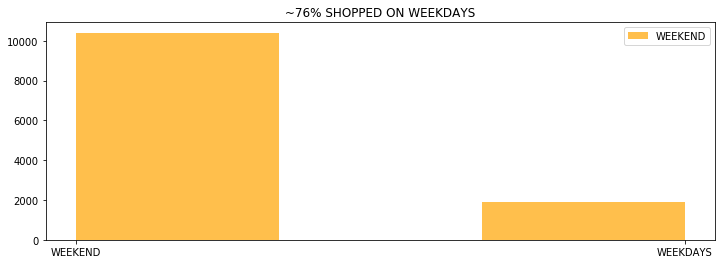

In [569]:
plt.figure(figsize=(12,4))
df['Revenue'].apply(lambda x: 1 if (x==True) else False ).hist(bins=3, alpha=0.7, color='orange', label='WEEKEND')
plt.grid()
plt.xticks([0,1],('WEEKEND', 'WEEKDAYS'))
plt.autoscale(enable=True)
plt.legend()
plt.title(' ~76% SHOPPED ON WEEKDAYS ')
plt.show()

#### REVENUE VS MONTH

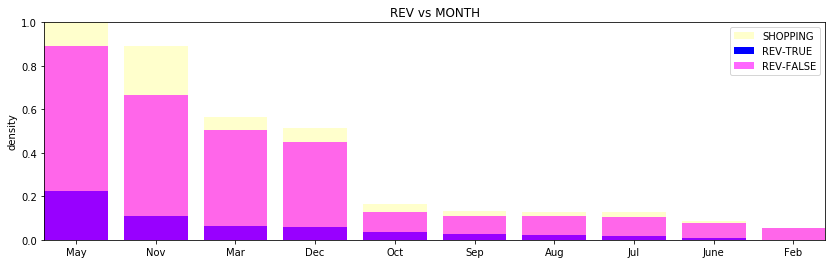

In [570]:
y0 = df['Month'].value_counts().values/np.max(df['Month'].value_counts().values)
y1 = df1['Month'].value_counts().values/np.max(df['Month'].value_counts().values)
y2 = df2['Month'].value_counts().values/np.max(df['Month'].value_counts().values)

plt.figure(figsize=(14,4))

plt.bar(df['Month'].value_counts().index,y0,alpha=0.2, color='yellow', label='SHOPPING' )
plt.bar(df['Month'].value_counts().index,y1,alpha=1.0, color='blue', label='REV-TRUE' )
plt.bar(df['Month'].value_counts().index,y2,alpha=0.6, color='magenta', label='REV-FALSE' )

plt.legend()
plt.title('REV vs MONTH')
plt.ylabel('density')
plt.autoscale(tight=True, enable=True)
plt.show()

In [571]:
df_w1 = df_w[ df_w['Revenue']==1 ]

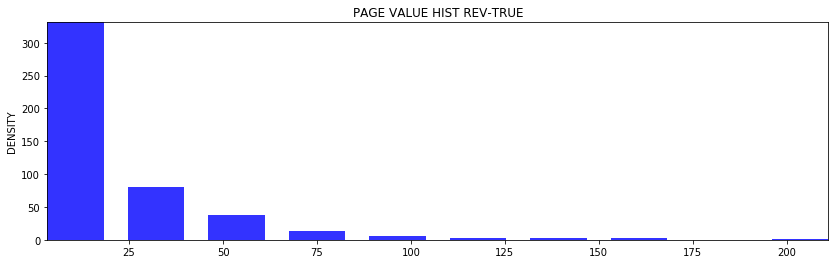

In [572]:
plt.figure(figsize=(14,4))
df_w1['PageValues'].hist(bins=10, alpha=0.8, color='blue', rwidth=0.7, label='PAGE VALUE')
plt.grid()
plt.autoscale(tight=True, enable=True)
plt.title('PAGE VALUE HIST REV-TRUE')
plt.ylabel('DENSITY')
plt.show()

### PIE CHARTS VIS

In [573]:
df['VisitorType'].value_counts()

Returning_Visitor    10537
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [574]:
pie_val = [ df['VisitorType'].value_counts()[0]/df['VisitorType'].value_counts().sum(), df['VisitorType'].value_counts()[1]/df['VisitorType'].value_counts().sum(), df['VisitorType'].value_counts()[1]/df['VisitorType'].value_counts().sum() ]
pie_val

[0.8555537512179279, 0.13754465735628452, 0.13754465735628452]

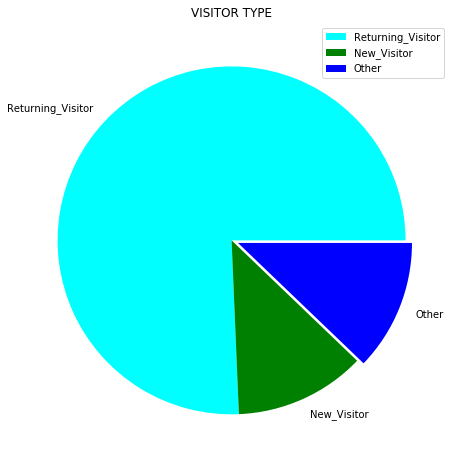

In [575]:
plt.figure(figsize=(8,8))
plt.pie(pie_val, colors = ['cyan', 'green', 'blue'], explode=[0, 0, 0.04], labels = ['Returning_Visitor', 'New_Visitor', 'Other']  )
plt.legend()
plt.title('VISITOR TYPE')
plt.show()

In [576]:
df['OperatingSystems'].value_counts()

2    6593
1    2582
3    2552
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

In [577]:
opsys = []
for val in df['OperatingSystems'].value_counts():
    opsys.append(val)
 

opsys

[6593, 2582, 2552, 478, 79, 19, 7, 6]

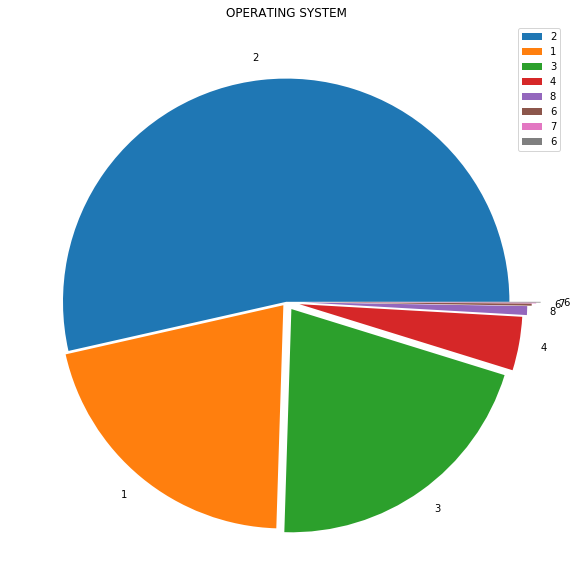

In [578]:
plt.figure(figsize=(10,12))
lab_list = ['2', '1', '3', '4', '8', '6', '7', '6'] 
exp_list = [0, 0.02, 0.04, 0.06, 0.08, 0.10, 0.12, 0.14]
plt.pie(opsys, labels = lab_list, explode = exp_list )
plt.legend()
plt.title('OPERATING SYSTEM')
plt.show()

In [579]:
df['SpecialDay'].value_counts()

0.0    11065
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: SpecialDay, dtype: int64

In [580]:
SP_DAY = []
category = []
idx = 0
norm = df['SpecialDay'].value_counts().sum()
for val in df['SpecialDay'].value_counts():
    SP_DAY.append(val/norm)
    category.append(df['SpecialDay'].value_counts().index[idx])
    idx += 1 


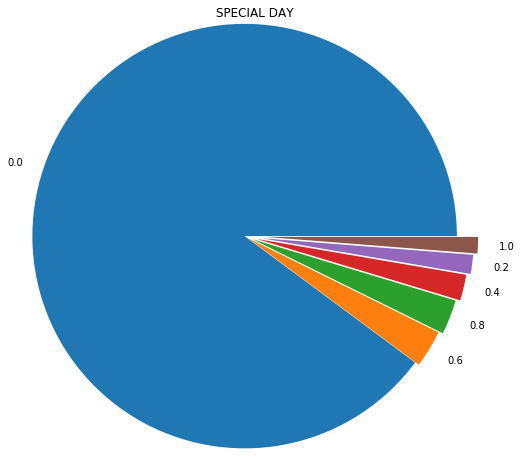

In [581]:
plt.figure(figsize=(8,10))
plt.pie(SP_DAY, labels=category, explode=[0, 0.02, 0.04, 0.06, 0.08, 0.10] )
plt.autoscale(enable=True, tight=True)
plt.title('SPECIAL DAY')
plt.grid()
plt.show()

In [582]:
df['Region'].value_counts()

1    4774
3    2402
4    1179
2    1134
6     804
7     761
9     511
8     434
5     317
Name: Region, dtype: int64

In [583]:
re_gion = []
categoryr = []
idx = 0
norm = df['SpecialDay'].value_counts().sum()
for val in df['SpecialDay'].value_counts():
    re_gion.append(val/norm)
    categoryr.append(df['SpecialDay'].value_counts().index[idx])
    idx += 1 

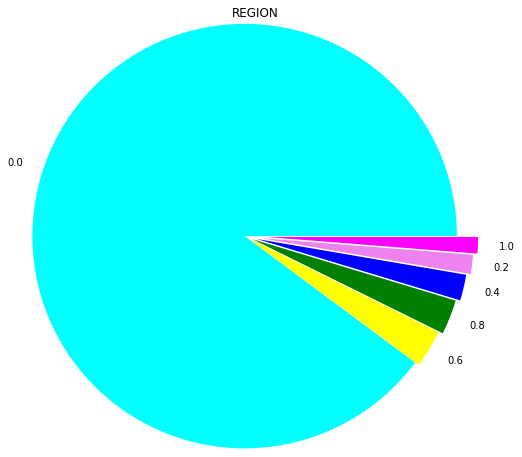

In [584]:
plt.figure(figsize=(8,10))
plt.pie(re_gion, labels=categoryr, explode=[0, 0.02, 0.04, 0.06, 0.08, 0.10], colors=['cyan','yellow','green','blue','violet','magenta'] )
plt.autoscale(enable=True, tight=True)
plt.title('REGION')
plt.grid()
plt.show()

### FEATURE ANALYSIS

#### VISITOR-TYPE

In [585]:
df['VisitorType'].value_counts()

Returning_Visitor    10537
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

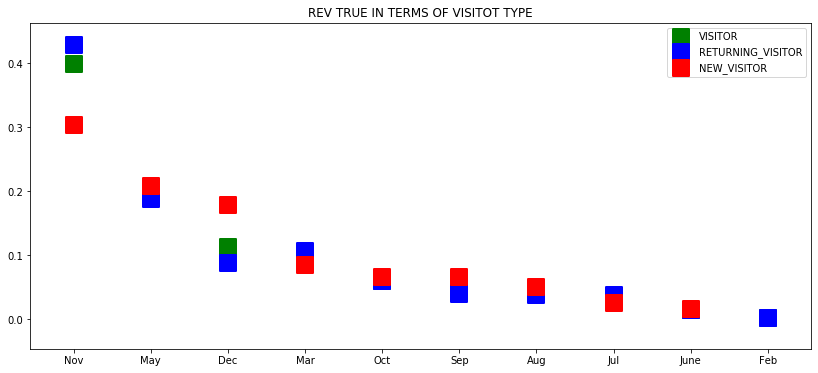

In [586]:
x = np.array(df1['Month'].value_counts().index)
y = np.array(df1['Month'].value_counts().values)/np.sum(np.array(df1['Month'].value_counts().values))

df1_1 = df1[ df['VisitorType']=='Returning_Visitor' ]
x1 = np.array(df1_1['Month'].value_counts().index)
y1 = np.array(df1_1['Month'].value_counts().values)/np.sum(np.array(df1_1['Month'].value_counts().values))

df1_1 = df1[ df['VisitorType']=='New_Visitor' ]
x2 = np.array(df1_1['Month'].value_counts().index)
y2 = np.array(df1_1['Month'].value_counts().values)/np.sum(np.array(df1_1['Month'].value_counts().values))

plt.figure(figsize=(14,6))
plt.scatter(x,y, s=2**8, c='green', marker='s',linewidths=2, label='VISITOR')
plt.scatter(x1,y1, s=2**8, c='blue', marker='s',linewidths=2, label='RETURNING_VISITOR')
plt.scatter(x2,y2, s=2**8, c='red', marker='s',linewidths=2, label='NEW_VISITOR')
plt.legend()
plt.title('REV TRUE IN TERMS OF VISITOT TYPE')
plt.show()

### WEEKDAYS vs WEEKEND

In [587]:
df1['Weekend'].value_counts()

False    1409
True      499
Name: Weekend, dtype: int64

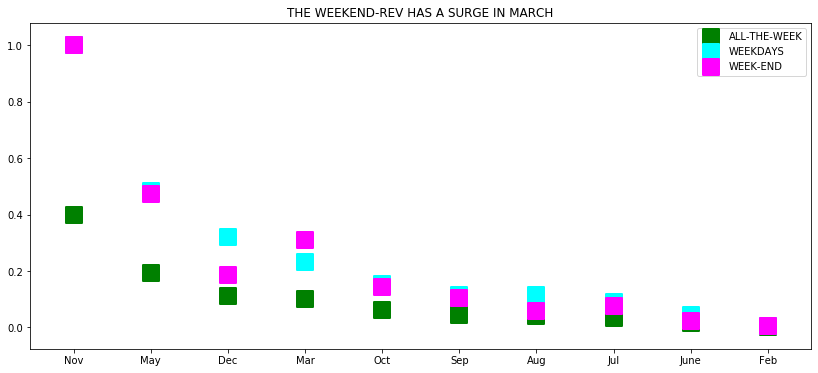

In [588]:
xx = np.array(df1['Month'].value_counts().index)
yy = np.array(df1['Month'].value_counts().values)/np.sum(np.array(df1['Month'].value_counts().values))


df1_1 = df1[ df1['Weekend']==False ]
xx1 = np.array(df1_1['Month'].value_counts().index)
yy1 = np.array(df1_1['Month'].value_counts().values)/np.max(np.array(df1_1['Month'].value_counts().values))

df1_1 = df1[ df1['Weekend']==True ]
xx2 = np.array(df1_1['Month'].value_counts().index)
yy2 = np.array(df1_1['Month'].value_counts().values)/np.max(np.array(df1_1['Month'].value_counts().values))


plt.figure(figsize=(14,6))
plt.scatter(xx,yy, s=2**8, c='green', marker='s',linewidths=2, label='ALL-THE-WEEK')
plt.scatter(xx1, yy1, s=2**8, c='cyan', marker='s',linewidths=2, label='WEEKDAYS' )
plt.scatter(xx2, yy2, s=2**8, c='magenta', marker='s',linewidths=2, label='WEEK-END' )
plt.title('THE WEEKEND-REV HAS A SURGE IN MARCH')
plt.legend()
plt.show()

##### We found here the week-end REV has a surge in the month of MARCH

### STATISTICAL ANALYSIS

In [589]:
len(df.columns), df.columns[0:6], df.columns[8], df.columns[17]

(18, Index(['Administrative', 'Administrative_Duration', 'Informational',
        'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration'],
       dtype='object'), 'PageValues', 'Revenue')

In [590]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.895952,0.061497,2.124147,2.357584,3.148019,4.070477
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.577926,0.199020,0.911566,1.718028,2.402211,4.024598
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [591]:
cols = [ 'Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']

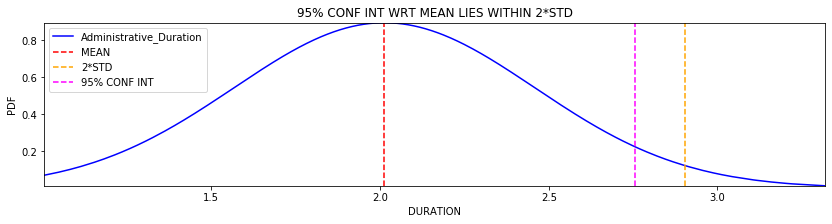

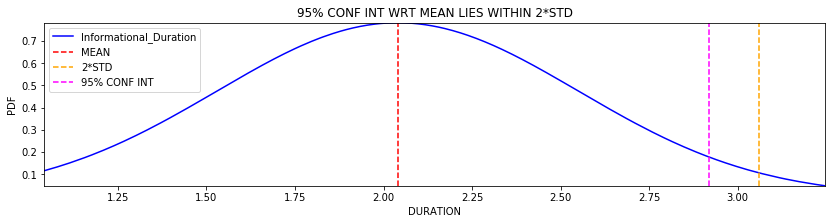

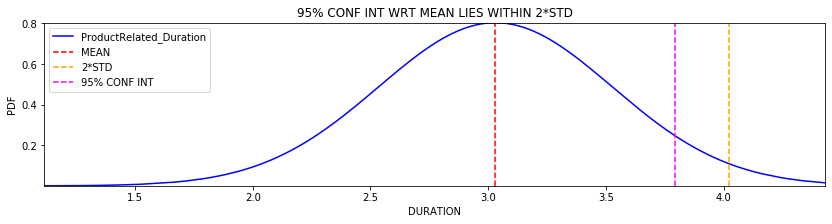

In [592]:
for col in cols:
    plt.figure(figsize=(14,3))
    df1_1 = df1[ df1[col]>10 ]
    data = np.sort(df1_1[col].apply(np.log10))
    data_pdf = scipy.stats.norm.pdf(data, loc=np.mean(data), scale=np.std(data) )
    data_cdf = scipy.stats.norm.cdf(data, loc=np.mean(data), scale=np.std(data) )
    plt.plot(data, data_pdf, label=col, color='blue')
    plt.axvline(np.mean(data), linestyle='--', label='MEAN', color='red')
    plt.axvline(np.mean(data)+2*np.std(data), linestyle='--', label='2*STD', color='orange')
    plt.axvline(np.percentile(data, [95]), linestyle='--', color='magenta', label='95% CONF INT')
    plt.legend()
    plt.autoscale(tight=True, enable=True)
    plt.title('95% CONF INT WRT MEAN LIES WITHIN 2*STD')
    plt.ylabel('PDF')
    plt.xlabel('DURATION')

### INFERENTIAL COMPARISON BETWEEN TWO GROUPS

o Revenue == True
o Revenue == False

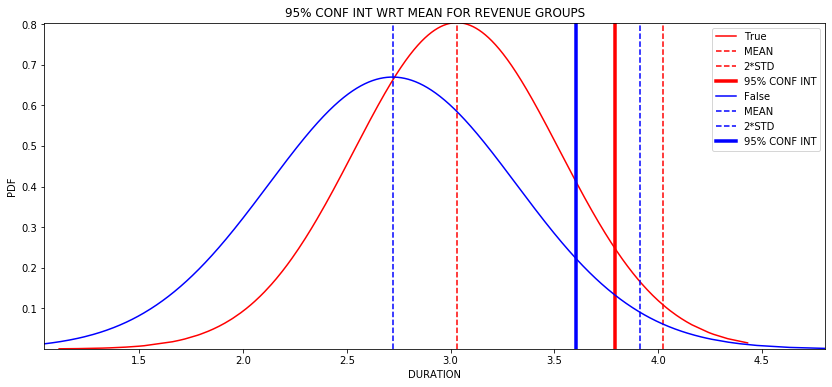

In [593]:
idx = 0
plt.figure(figsize=(14,6))
bolls = [True, False]
colr_data = ['red', 'blue']
for col in bolls:
    df1_1 = df[df['Revenue'] == col]
    df1_1 = df1_1[ df1_1['ProductRelated_Duration'] >10 ]
    datalog = np.sort(df1_1['ProductRelated_Duration'].apply(np.log10))
    datalog_pdf=scipy.stats.norm.pdf(datalog, loc=np.mean(datalog), scale=np.std(datalog) ) 
    datalog_cdf = scipy.stats.norm.cdf(datalog, loc=np.mean(datalog), scale=np.std(datalog) )
    plt.plot(datalog, datalog_pdf, color=colr_data[idx], label=col)
    plt.axvline(np.mean(datalog), linestyle='--', color=colr_data[idx], label='MEAN')
    plt.axvline(np.mean(datalog)+2*np.std(datalog), linestyle='--', color=colr_data[idx], label='2*STD')
    plt.axvline(np.percentile(datalog, [95]), linestyle='-', color=colr_data[idx], label='95% CONF INT', linewidth=3.5)
    plt.legend()
    plt.ylabel('PDF')
    plt.xlabel('DURATION')
    plt.title('95% CONF INT WRT MEAN FOR REVENUE GROUPS')
    plt.autoscale(tight=True, enable=True)
    idx += 1

In [594]:
df_RT = df[df['Revenue'] == True]
df_RF = df[df['Revenue'] == False]

df1 = df_RT[ df_RT['ProductRelated_Duration'] >10 ]
df2 = df_RF[ df_RF['ProductRelated_Duration'] >10 ]

ttest_ind(df1['ProductRelated_Duration'], df2['ProductRelated_Duration'], equal_var=False)

Ttest_indResult(statistic=12.952064466401076, pvalue=3.959749814353132e-37)

[]

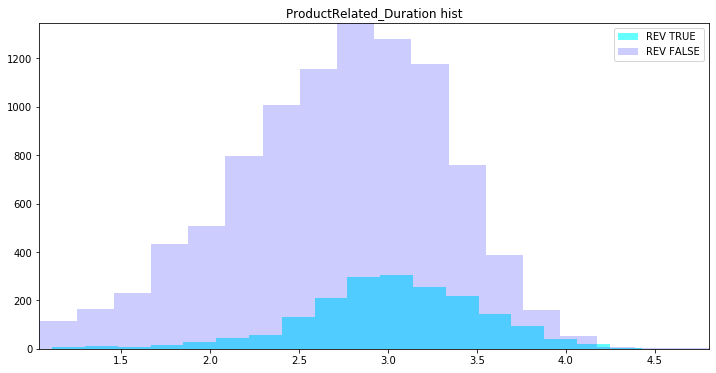

In [595]:
plt.figure(figsize=(12,6))
df1['ProductRelated_Duration'].apply(np.log10).hist(bins=18, alpha=0.6, color='cyan', label='REV TRUE')
df2['ProductRelated_Duration'].apply(np.log10).hist(bins=18, alpha=0.2, color='blue', label='REV FALSE')
plt.grid()
plt.autoscale(enable=True, tight=True)
plt.legend()
plt.title('ProductRelated_Duration hist')
plt.plot()

#### ML PREDICTIONS

In [596]:
df = df[df['Administrative_Duration'] > 0]
# df = df[df['ProductRelated_Duration'] > 0]
# df = df[df['Informational_Duration'] > 0]
print(len(df))
df['REV_B'] = df['Revenue'].apply(lambda x: 1 if x==True else 0)
df['WEEK_B'] = df['Weekend'].apply(lambda x: 1 if x==True else 0)
df.head()

6426


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,REV_B,WEEK_B
15,2.0,53.0,0.0,0.0,23.0,1668.285119,0.008333,0.016313,0.000000,0.0,Feb,1,1,9,3,Returning_Visitor,False,False,0,0
26,4.0,64.6,0.0,0.0,32.0,1135.444444,0.002857,0.009524,0.000000,0.0,Feb,2,2,1,3,Returning_Visitor,False,False,0,0
29,1.0,6.0,1.0,0.0,45.0,1582.750000,0.043478,0.050821,54.179764,0.4,Feb,3,2,1,1,Returning_Visitor,False,False,0,0
37,2.0,18.0,0.0,0.0,5.0,298.000000,0.000000,0.028571,0.000000,0.8,Feb,2,2,8,4,Returning_Visitor,False,False,0,0
40,1.0,9.0,0.0,0.0,46.0,4084.393939,0.000000,0.001795,0.000000,0.0,Feb,2,2,8,4,Returning_Visitor,False,False,0,0


In [597]:
month_Num = {"May":5, "Nov": 11, "Mar":3, "Dec":12, "Oct":10, "Sep":9, "Aug":8, "Jul":7,
                     "June":6, "Feb":2} 

In [598]:
df['Month_1'] = df['Month'].map(month_Num)
df['Month_1'].value_counts()

11    1612
5     1564
3      914
12     867
10     430
9      330
8      292
7      251
6      139
2       27
Name: Month_1, dtype: int64

In [599]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,REV_B,WEEK_B,Month_1
count,6426.000000,6426.000000,6426.000000,6426.000000,6426.000000,6426.000000,6426.000000,6426.000000,6426.000000,6426.000000,6426.000000,6426.000000,6426.000000,6426.000000,6426.000000,6426.000000,6426.000000
mean,4.420479,155.069012,0.819639,56.871435,44.252256,1668.571775,0.007029,0.022660,8.154681,0.038500,2.110955,2.322284,3.172269,3.905229,0.211640,0.249144,7.928571
std,3.448653,220.118266,1.574899,177.094812,53.840491,2352.744464,0.011966,0.017269,20.256561,0.159822,0.877376,1.668455,2.404674,3.773330,0.408503,0.432551,3.279513
min,1.000000,1.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000
25%,2.000000,40.000000,0.000000,0.000000,14.000000,408.741667,0.000000,0.011086,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000,5.000000
50%,3.000000,88.000000,0.000000,0.000000,27.000000,964.257143,0.001852,0.018519,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,9.000000
75%,6.000000,183.000000,1.000000,21.200000,53.000000,2022.929445,0.009608,0.029412,7.058281,0.000000,2.000000,2.000000,4.000000,4.000000,0.000000,0.000000,11.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.161905,0.150000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000,1.000000,12.000000


In [600]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6426 entries, 15 to 12328
Data columns (total 21 columns):
Administrative             6426 non-null float64
Administrative_Duration    6426 non-null float64
Informational              6426 non-null float64
Informational_Duration     6426 non-null float64
ProductRelated             6426 non-null float64
ProductRelated_Duration    6426 non-null float64
BounceRates                6426 non-null float64
ExitRates                  6426 non-null float64
PageValues                 6426 non-null float64
SpecialDay                 6426 non-null float64
Month                      6426 non-null object
OperatingSystems           6426 non-null int64
Browser                    6426 non-null int64
Region                     6426 non-null int64
TrafficType                6426 non-null int64
VisitorType                6426 non-null object
Weekend                    6426 non-null bool
Revenue                    6426 non-null bool
REV_B                    

In [601]:
attr = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues',
       'SpecialDay', 'Month_1', 'OperatingSystems', 'Browser', 'WEEK_B']

for col in attr:
    print(df[col].head(2))

15    2.0
26    4.0
Name: Administrative, dtype: float64
15    53.0
26    64.6
Name: Administrative_Duration, dtype: float64
15    0.0
26    0.0
Name: Informational, dtype: float64
15    0.0
26    0.0
Name: Informational_Duration, dtype: float64
15    23.0
26    32.0
Name: ProductRelated, dtype: float64
15    1668.285119
26    1135.444444
Name: ProductRelated_Duration, dtype: float64
15    0.008333
26    0.002857
Name: BounceRates, dtype: float64
15    0.016313
26    0.009524
Name: ExitRates, dtype: float64
15    0.0
26    0.0
Name: PageValues, dtype: float64
15    0.0
26    0.0
Name: SpecialDay, dtype: float64
15    2
26    2
Name: Month_1, dtype: int64
15    1
26    2
Name: OperatingSystems, dtype: int64
15    1
26    2
Name: Browser, dtype: int64
15    0
26    0
Name: WEEK_B, dtype: int64


#### Logistic Regression

In [602]:
x_tr, x_t, y_tr, y_t = train_test_split( df[attr].values, (df['REV_B']).values, test_size=0.4)
lr = LogisticRegression()
lr.fit(x_tr, y_tr)
y_p = lr.predict(x_t)
y_tr_p = lr.predict(x_tr)

,ML Model,accuracy_,f1_,precision_,recall,ROC
0,LogisticRegression,0.821859,0.421717,0.695833,0.302536,0.63319


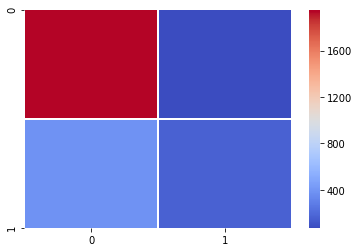

In [603]:
accu = accuracy_score(y_t, y_p)
f1 = f1_score(y_t, y_p)
prece = precision_score(y_t, y_p)
recal = recall_score(y_t, y_p)
roc = roc_auc_score(y_t, y_p)

matric_v = ['LogisticRegression', accu, f1, prece, recal, roc]
matric_n = ['ML Model', 'accuracy_', 'f1_', 'precision_', 'recall', 'ROC']

cmatrix = confusion_matrix(y_t, y_p)
sns.heatmap(cmatrix, cbar=True, square=False, linewidth=1.0, cmap='coolwarm')

pd.DataFrame( [['LogisticRegression', accu, f1, prece, recal, roc]], columns= matric_n )

#### GaussianNB

In [604]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(df[attr], df['REV_B'])
y_p = gnb.predict(x_t)

In [605]:
dtc = DecisionTreeClassifier()
dtc.fit(x_tr, y_tr)
y_t = dtc.predict(x_t)
print( ' Accuracy score : ', accuracy_score(y_t, y_p), ', ROC score', roc_auc_score(y_t, y_p))

 Accuracy score :  0.8035783741734733 , ROC score 0.6548133595284872


,ML Model,accuracy_,f1_,precision_,recall,ROC
0,LogisticRegression,0.803578,0.458735,0.537688,0.4,0.654813


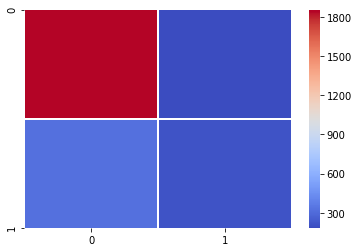

In [606]:
accu = accuracy_score(y_t, y_p)
f1 = f1_score(y_t, y_p)
prece = precision_score(y_t, y_p)
recal = recall_score(y_t, y_p)
roc = roc_auc_score(y_t, y_p)

matric_v = ['LogisticRegression', accu, f1, prece, recal, roc]
matric_n = ['ML Model', 'accuracy_', 'f1_', 'precision_', 'recall', 'ROC']

cmatrix = confusion_matrix(y_t, y_p)
sns.heatmap(cmatrix, cbar=True, square=False, linewidth=1.0, cmap='coolwarm')

pd.DataFrame( [['LogisticRegression', accu, f1, prece, recal, roc]], columns= matric_n )

#### ExtraTreesClassifier

In [607]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
clf_extree = ExtraTreesClassifier()
clf_extree.fit(x_tr, y_tr)
y_p = clf_extree.predict(x_t)

In [608]:
accu = accuracy_score(y_t, y_p)
f1 = f1_score(y_t, y_p)
prece = precision_score(y_t, y_p)
recal = recall_score(y_t, y_p)
roc = roc_auc_score(y_t, y_p)

matric_n = ['ML Model', 'accuracy_', 'f1_', 'precision_', 'recall', 'ROC']
pd.DataFrame( [['LogisticRegression', accu, f1, prece, recal, roc]], columns= matric_n )

,ML Model,accuracy_,f1_,precision_,recall,ROC
0,LogisticRegression,0.823415,0.446341,0.642105,0.342056,0.645979


#### RandomForestClassifier

In [609]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_tr, y_tr)
y_p = clf.predict(x_t)

In [610]:
accu = accuracy_score(y_t, y_p)
f1 = f1_score(y_t, y_p)
prece = precision_score(y_t, y_p)
recal = recall_score(y_t, y_p)
roc = roc_auc_score(y_t, y_p)

matric_n = ['ML Model', 'accuracy_', 'f1_', 'precision_', 'recall', 'ROC']
pd.DataFrame( [['LogisticRegression', accu, f1, prece, recal, roc]], columns= matric_n )

,ML Model,accuracy_,f1_,precision_,recall,ROC
0,LogisticRegression,0.833528,0.513636,0.655072,0.42243,0.681991


In [611]:
y_tr_p = clf.predict(x_tr)
accu = accuracy_score(y_tr, y_tr_p)
f1 = f1_score(y_tr, y_tr_p)
prece = precision_score(y_tr, y_tr_p)
recal = recall_score(y_tr, y_tr_p)
roc = roc_auc_score(y_tr, y_tr_p)

matric_n = ['ML Model', 'accuracy_', 'f1_', 'precision_', 'recall', 'ROC']
pd.DataFrame( [['LogisticRegression', accu, f1, prece, recal, roc]], columns= matric_n )

,ML Model,accuracy_,f1_,precision_,recall,ROC
0,LogisticRegression,0.988327,0.971609,0.990991,0.95297,0.975336


#### ensemble.GradientBoostingClassifier

In [612]:
from sklearn import ensemble
clf = ensemble.GradientBoostingClassifier()
clf.fit(x_tr, y_tr)
y_p = clf.predict(x_t)

In [613]:
accu = accuracy_score(y_t, y_p)
f1 = f1_score(y_t, y_p)
prece = precision_score(y_t, y_p)
recal = recall_score(y_t, y_p)
roc = roc_auc_score(y_t, y_p)

matric_n = ['ML Model', 'accuracy_', 'f1_', 'precision_', 'recall', 'ROC']
pd.DataFrame( [['LogisticRegression', accu, f1, prece, recal, roc]], columns= matric_n )

,ML Model,accuracy_,f1_,precision_,recall,ROC
0,LogisticRegression,0.845974,0.596741,0.655481,0.547664,0.736013


In [614]:
y_tr_p = clf.predict(x_tr)
accu = accuracy_score(y_tr, y_tr_p)
f1 = f1_score(y_tr, y_tr_p)
prece = precision_score(y_tr, y_tr_p)
recal = recall_score(y_tr, y_tr_p)
roc = roc_auc_score(y_tr, y_tr_p)

matric_n = ['ML Model', 'accuracy_', 'f1_', 'precision_', 'recall', 'ROC']
pd.DataFrame( [['LogisticRegression', accu, f1, prece, recal, roc]], columns= matric_n )

,ML Model,accuracy_,f1_,precision_,recall,ROC
0,LogisticRegression,0.88716,0.709807,0.769899,0.658416,0.803117


### RECEIVER OPERATING CHARACTERSTIC (ROC), CROSS VALIDATION


ROC curve is a graphical plot that illustrates the performance of a binary classifier system as its discrimination threshold is verified.

ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.

ROC curves are appropriate when the observations are balanced between each class, whereas precision-recall curves are appropriate for imbalanced datasets.

In [615]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

Text(0, 0.5, 'True Positive Rate')

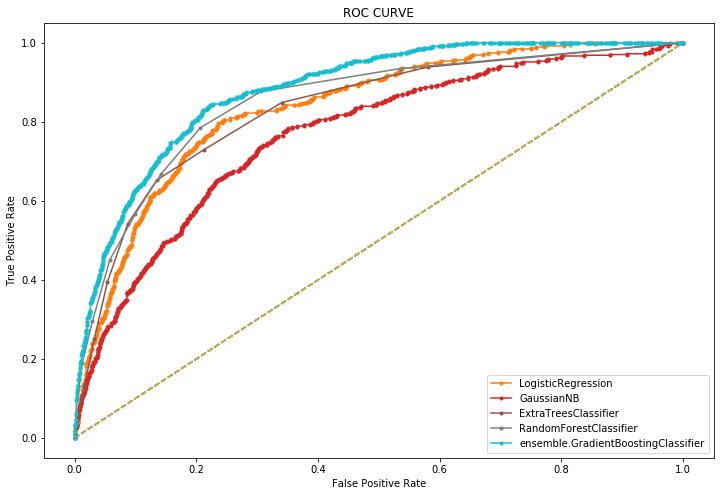

In [616]:
idx = 0
plt.figure(figsize=(12,8))
ns_probs = [0 for _ in range(len(y_t))] # no skill prediction 

MLclf = [LogisticRegression(), GaussianNB(), ExtraTreesClassifier(), RandomForestClassifier(), ensemble.GradientBoostingClassifier() ]
lablist = ['LogisticRegression' , 'GaussianNB', 'ExtraTreesClassifier', 'RandomForestClassifier', 'ensemble.GradientBoostingClassifier']

roc_list = []
for clf in MLclf: 
    y_p = clf.fit(x_tr, y_tr).predict(x_t)
    clf_probs = clf.predict_proba(x_t)
    clf_probs = clf_probs[:, 1]
    ns_auc = roc_auc_score(y_t, ns_probs)
    clf_auc = roc_auc_score(y_t, clf_probs)
    ns_fpr, ns_tpr, _ = roc_curve(y_t, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_t, clf_probs) 
    lab_p = lablist[idx] 
    plt.plot(ns_fpr, ns_tpr, linestyle='--')
    plt.plot(lr_fpr, lr_tpr, marker='.', label=lab_p ) 
    pyplot.legend()
    idx += 1
    roc_list.append(roc_auc_score(y_t, y_p))
    

plt.title('ROC CURVE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [617]:
best_roc = 0
best_roc_idx = 0

for idx in range(len(roc_list)):
    if (roc_list[idx]>best_roc):
        best_roc = roc_list[idx]
        best_roc_idx = idx
        
print('The best classifier from default parameter : ExtraTreeClassifier', '\n', 'with roc_auc_score : ', best_roc)

The best classifier from default parameter : ExtraTreeClassifier 
 with roc_auc_score :  0.7360125222628207


In [618]:
def grid_search():
    depth_grid = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    roc_score = []
    for d in depth_grid:
        score = 0
        for rn in range(10):
            clf = RandomForestClassifier(max_depth=d)
            clf.fit(x_tr, y_tr)
            y_p = clf.predict(x_t)
            score += roc_auc_score(y_t, y_p)
        roc_score.append(score/10.0)
    return depth_grid,roc_score

In [619]:
tree_depth, score = grid_search()

,ML Model,accuracy_,f1_,precision_,recall,ROC
0,LogisticRegression,0.845974,0.596741,0.655481,0.547664,0.736013


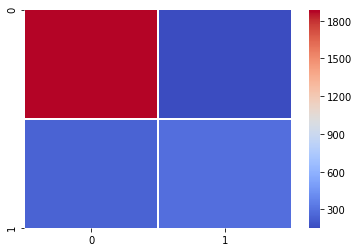

In [620]:
accu = accuracy_score(y_t, y_p)
f1 = f1_score(y_t, y_p)
prece = precision_score(y_t, y_p)
recal = recall_score(y_t, y_p)
roc = roc_auc_score(y_t, y_p)

matric_v = ['LogisticRegression', accu, f1, prece, recal, roc]
matric_n = ['ML Model', 'accuracy_', 'f1_', 'precision_', 'recall', 'ROC']

cmatrix = confusion_matrix(y_t, y_p)
sns.heatmap(cmatrix, cbar=True, square=False, linewidth=1.0, cmap='coolwarm')

pd.DataFrame( [['LogisticRegression', accu, f1, prece, recal, roc]], columns= matric_n )